## Returning the best dataset settings from our optimization experiments

---


In [27]:
import sys  
sys.path.insert(0, '../../')

In [ ]:
!pip install seaborn  
!pip install matplotlib

In [28]:
import matplotlib.pyplot as plt

We now reload our three studies from the results folder and find the best values / parameters

In [29]:
import optuna
import pandas as pd

study_name_1 = 'two_moons'
two_moons_study = optuna.create_study(study_name=study_name_1, storage=f'sqlite:///../../results/optimization/{study_name_1}.db', load_if_exists=True, direction='maximize')
two_moons_results = pd.read_csv(f'../../results/optimization/{study_name_1}.csv') 

study_name_2 = 'den_blobs'
blobs_study = optuna.create_study(study_name=study_name_2, storage=f'sqlite:///../../results/optimization/{study_name_2}.db', load_if_exists=True, direction='maximize')
blobs_results = pd.read_csv(f'../../results/optimization/{study_name_2}.csv') 

study_name_3 = 'rings'
ring_study = optuna.create_study(study_name='rings', storage=f'sqlite:///../../results/optimization/{study_name_3}.db', load_if_exists=True, direction='maximize')
rings_results = pd.read_csv(f'../../results/optimization/{study_name_3}.csv') 

[I 2021-05-31 13:29:11,279] Using an existing study with name 'two_moons' instead of creating a new one.
[I 2021-05-31 13:29:11,343] Using an existing study with name 'den_blobs' instead of creating a new one.
[I 2021-05-31 13:29:11,379] Using an existing study with name 'rings' instead of creating a new one.


Now we can load our best AMI difference value (i.e., the difference of the AMI obtained by Rock to the AMI obtained by  the best competitor, averaged over ten random seeds) und data parameters.

In [30]:
print(two_moons_study.best_value)
print(two_moons_study.best_params)
print(two_moons_study.best_trial)
moons_jitter = two_moons_study.best_params['jitter'] * 0.01
moons_samples = two_moons_study.best_params['n_samples'] * 100

0.3580777415846451
{'jitter': 15, 'n_samples': 10}
FrozenTrial(number=4, values=[0.3580777415846451], datetime_start=datetime.datetime(2021, 5, 30, 16, 38, 40, 711857), datetime_complete=datetime.datetime(2021, 5, 30, 16, 39, 41, 672550), params={'jitter': 15, 'n_samples': 10}, distributions={'jitter': IntUniformDistribution(high=20, low=1, step=1), 'n_samples': IntUniformDistribution(high=16, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=5, state=TrialState.COMPLETE, value=None)


In [31]:
two_moons_results.iloc[10 * 4: 10 * 5]

,Unnamed: 0,run_id,step,n_samples,jitter,k,eps,min_pts,bandwidth,ROCK,K_MEANS,DBSCAN,SPECTRAL,MEAN_SHIFT
40,40,0,0,1000,0.15,2,0.2,4,1.249697,0.876718,0.390200,0.001767,0.447690,0.439425
41,41,0,1,1000,0.15,2,0.2,4,1.254384,0.658533,0.351070,-0.000979,0.398060,0.415874
42,42,0,2,1000,0.15,2,0.2,4,1.251109,0.477730,0.370152,-0.001268,0.438322,0.451415
43,43,0,3,1000,0.15,2,0.2,4,1.249379,0.912650,0.385572,0.004569,0.428786,0.434082
44,44,0,4,1000,0.15,2,0.2,4,1.250861,0.887986,0.358124,-0.000937,0.397452,0.418149
45,45,0,5,1000,0.15,2,0.2,4,1.241584,0.810535,0.382286,0.000418,0.434018,0.434018
46,46,0,6,1000,0.15,2,0.2,4,1.245107,0.908390,0.362989,-0.000055,0.397286,0.415472
47,47,0,7,1000,0.15,2,0.2,4,1.249491,0.577845,0.367659,-0.000979,0.412816,0.434467
48,48,0,8,1000,0.15,2,0.2,4,1.241564,0.864449,0.362846,0.005226,0.423290,0.431282
49,49,0,9,1000,0.15,2,0.2,4,1.254445,0.906393,0.372491,-0.001259,0.399841,0.417999


absolute AMI of Rock for the best setting (mean and sd):

In [65]:
df = two_moons_results.iloc[10 * 4: 10 * 5]
print(df["ROCK"].mean(), df["ROCK"].std())

0.7881227607718606 0.15827649676269806


absolute AMI of DBSCAN for Rock's best setting (mean and sd), this result is described in the paper in the section on hyperparameter optimization of Rock vs. DBSCAN

In [66]:
print(df["DBSCAN"].mean(), df["DBSCAN"].std())

0.0006504213797113847 0.0024322376718008674


In [32]:
# jitter does not matter here since it is not used for the generation of blobs
print(blobs_study.best_value)
print(blobs_study.best_params)
print(blobs_study.best_trial)
blobs_features = blobs_study.best_params['n_features']
blobs_samples = blobs_study.best_params['n_samples'] * 100
blobs_centers = blobs_study.best_params['n_centers']

0.04754203356431452
{'n_centers': 2, 'n_features': 3, 'n_samples': 3}
FrozenTrial(number=98, values=[0.04754203356431452], datetime_start=datetime.datetime(2021, 5, 30, 20, 41, 50, 627038), datetime_complete=datetime.datetime(2021, 5, 30, 20, 42, 0, 283247), params={'n_centers': 2, 'n_features': 3, 'n_samples': 3}, distributions={'n_centers': IntUniformDistribution(high=10, low=2, step=1), 'n_features': IntUniformDistribution(high=20, low=2, step=1), 'n_samples': IntUniformDistribution(high=16, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=99, state=TrialState.COMPLETE, value=None)


In [33]:
blobs_results.iloc[98 * 10 : 99 * 10]

,Unnamed: 0,run_id,step,n_samples,n_centers,n_features,k,eps,min_pts,bandwidth,ROCK,K_MEANS,DBSCAN,SPECTRAL,MEAN_SHIFT
980,980,0,0,300,2,3,2,0.2,6,1.689874,0.530024,0.545164,0.000000,0.502532,0.000000
981,981,0,1,300,2,3,2,0.2,6,1.588324,0.877911,0.717765,0.108667,0.749363,0.719539
982,982,0,2,300,2,3,2,0.2,6,1.607507,0.751017,0.660068,0.030973,0.688315,0.000000
983,983,0,3,300,2,3,2,0.2,6,1.637970,0.971025,0.728040,0.061105,0.795633,0.786675
984,984,0,4,300,2,3,2,0.2,6,1.406414,1.000000,0.820996,0.208917,0.948730,0.910810
985,985,0,5,300,2,3,2,0.2,6,1.055450,1.000000,0.971025,0.477836,1.000000,1.000000
986,986,0,6,300,2,3,2,0.2,6,1.303438,1.000000,0.948730,0.290504,1.000000,1.000000
987,987,0,7,300,2,3,2,0.2,6,1.549506,0.971025,0.910810,0.074892,0.910810,0.910810
988,988,0,8,300,2,3,2,0.2,6,0.923163,1.000000,1.000000,0.534517,1.000000,1.000000
989,989,0,9,300,2,3,2,0.2,6,1.525829,0.779499,0.689425,0.079444,0.697915,0.767065


absolute AMI of Rock for the best setting (mean and sd):

In [62]:
df = blobs_results.iloc[98 * 10 : 99 * 10]
print(df["ROCK"].mean(), df["ROCK"].std())

0.8880501031169 0.1573203020468519


In [34]:
print(ring_study.best_value)
print(ring_study.best_params)
print(ring_study.best_trial)
ring_jitter = ring_study.best_params['jitter'] * 0.01
ring_samples = ring_study.best_params['n_samples'] * 100

0.1789493922434452
{'factor': 8, 'jitter': 2, 'n_samples': 16}
FrozenTrial(number=23, values=[0.1789493922434452], datetime_start=datetime.datetime(2021, 5, 30, 15, 19, 1, 940730), datetime_complete=datetime.datetime(2021, 5, 30, 15, 22, 37, 272047), params={'factor': 8, 'jitter': 2, 'n_samples': 16}, distributions={'factor': IntUniformDistribution(high=9, low=1, step=1), 'jitter': IntUniformDistribution(high=20, low=1, step=1), 'n_samples': IntUniformDistribution(high=16, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=24, state=TrialState.COMPLETE, value=None)


In [35]:
rings_results.iloc[23 * 10 : 24 * 10]

,Unnamed: 0,run_id,step,n_samples,jitter,factor,k,eps,min_pts,bandwidth,ROCK,K_MEANS,DBSCAN,SPECTRAL,MEAN_SHIFT
230,230,0,0,1600,0.02,0.8,2,0.2,4,1.286035,0.184449,-0.000447,0.0,-0.000433,-0.000885
231,231,0,1,1600,0.02,0.8,2,0.2,4,1.286037,0.176612,-0.000411,0.0,-0.000433,-0.000875
232,232,0,2,1600,0.02,0.8,2,0.2,4,1.285985,0.174825,-0.000447,0.0,-0.000451,-0.000888
233,233,0,3,1600,0.02,0.8,2,0.2,4,1.286025,0.179190,-0.000447,0.0,-0.000450,-0.000876
234,234,0,4,1600,0.02,0.8,2,0.2,4,1.285884,0.179784,-0.000447,0.0,-0.000451,-0.000892
235,235,0,5,1600,0.02,0.8,2,0.2,4,1.285881,0.180217,-0.000441,0.0,-0.000447,-0.000894
236,236,0,6,1600,0.02,0.8,2,0.2,4,1.285939,0.177021,-0.000450,0.0,-0.000423,-0.000885
237,237,0,7,1600,0.02,0.8,2,0.2,4,1.286074,0.179774,-0.000447,0.0,-0.000447,-0.000880
238,238,0,8,1600,0.02,0.8,2,0.2,4,1.285750,0.178763,-0.000451,0.0,-0.000447,-0.000887
239,239,0,9,1600,0.02,0.8,2,0.2,4,1.285750,0.178860,-0.000441,0.0,-0.000451,-0.000894


absolute AMI of Rock for the best setting (mean and sd):

In [63]:
df = rings_results.iloc[23 * 10 : 24 * 10]
print(df["ROCK"].mean(), df["ROCK"].std())

0.1789493922434452 0.0025718810040739073


Now we can reconstruct a data example from each of these trials. Each trial consists of 10 runs with different random seeds, we use only the first seed (0) for the following examples. 

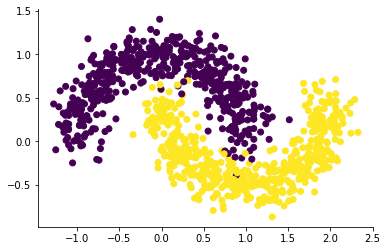

In [48]:
from sklearn.datasets import make_blobs, make_circles, make_moons

X, y = make_moons(n_samples=moons_samples, noise=moons_jitter, shuffle=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid(False)
plt.savefig('two_moons_example.png')

In [49]:
import numpy as np
def getBlobDensities(n_centers):
  return np.round([3/n_centers * x for x in range(1, n_centers + 1)], decimals=2)

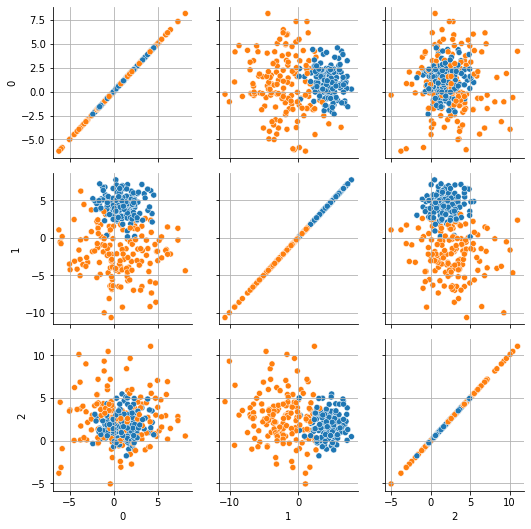

In [58]:
import seaborn as sns

X, y = make_blobs(n_samples=blobs_samples, centers=blobs_centers, n_features=blobs_features, cluster_std=getBlobDensities(blobs_centers), shuffle=True, random_state=0)
blobs = pd.DataFrame(X)
blobs['cluster'] = y
g = sns.PairGrid(blobs, hue='cluster')
g.map(sns.scatterplot)
plt.savefig('blobs_example_pair.png')

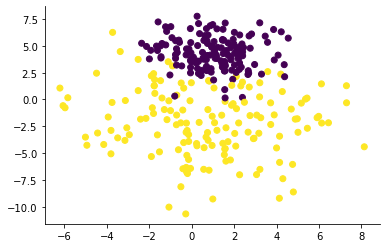

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid(False)
plt.savefig('blobs_example.png')

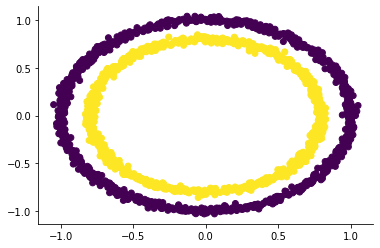

In [52]:
X, y = make_circles(n_samples=ring_samples, noise=ring_jitter, shuffle=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid(False)
plt.savefig('rings_example.png')

Now we look at the course of the optimizations. 


In [53]:
df1 = two_moons_study.trials_dataframe(attrs=("number", "value", "params", "state"))
df2 = blobs_study.trials_dataframe(attrs=("number", "value", "params", "state"))
df3 = ring_study.trials_dataframe(attrs=("number", "value", "params", "state"))

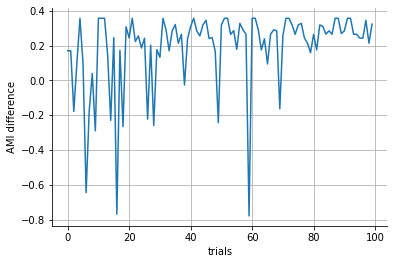

In [57]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
df1['value'].plot()
plt.xlabel('trials')
plt.ylabel('AMI difference')
plt.savefig('moons_progress.png')

Text(0, 0.5, 'AMI difference')

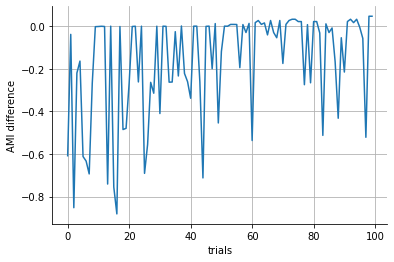

In [55]:
df2['value'].plot()
plt.xlabel('trials')
plt.ylabel('AMI difference')

Text(0, 0.5, 'AMI difference')

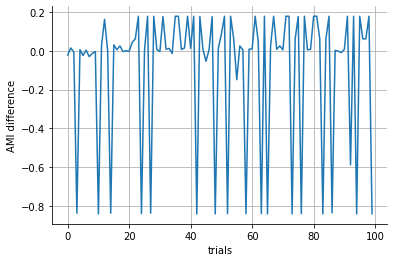

In [56]:
df3['value'].plot()
plt.xlabel('trials')
plt.ylabel('AMI difference')